In [1]:
from Environments.RandomWalk import make_random_walk, estimate_goal_probability
from Environments.FrozenLake import make_frozen_lake

from Sarsa.ExpectedSarsa import ExpectedSarsaCV
from TD.TDZero import TDZeroCV
from TrueTD.TrueOnlineTDLambda import TrueOnlineTDLambdaCV
from TrueTD.TrueOnlineTDLambdaReplay import TrueOnlineTDLambdaReplayCV


pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Environments Estimated MC Success Rate

In [2]:
frozen_lake = make_frozen_lake()
random_walk = make_random_walk()

In [3]:
print("Random Walk")
estimate_goal_probability(random_walk)

print("Frozen Lake")
estimate_goal_probability(frozen_lake)

Random Walk
Estimated probability of reaching the goal: 0.1934
Frozen Lake
Estimated probability of reaching the goal: 0.0145


In [4]:
import numpy as np

params_grid = {
    "alpha": np.linspace(0.0001, 1, 30),
    "gamma": np.linspace(0.01, 1, 30),
    "epsilon": np.linspace(0.01, 1, 10),
    "decay_rate": np.linspace(0.01, 1, 20),
    "lmbda": np.linspace(0.001, 1, 30),
}

### TD(0) + Random Walk

In [ ]:
# Best results: alpha=0.003, gamma=0.7
cv = TDZeroCV(random_walk, params_grid)

cv.search(episodes=5000)
cv.summary()
cv.plot_metrics()

Number of permutations: 900
Alpha values: [0.0001, 0.0346, 0.0691, 0.1035, 0.138, 0.1725, 0.207, 0.2415, 0.2759, 0.3104, 0.3449, 0.3794, 0.4139, 0.4483, 0.4828, 0.5173, 0.5518, 0.5862, 0.6207, 0.6552, 0.6897, 0.7242, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966, 0.931, 0.9655, 1.0]
Gamma values: [0.01, 0.0441, 0.0783, 0.1124, 0.1466, 0.1807, 0.2148, 0.249, 0.2831, 0.3172, 0.3514, 0.3855, 0.4197, 0.4538, 0.4879, 0.5221, 0.5562, 0.5903, 0.6245, 0.6586, 0.6928, 0.7269, 0.761, 0.7952, 0.8293, 0.8634, 0.8976, 0.9317, 0.9659, 1.0]
Alpha: 0.0001, Gamma: 0.0100, Avg Success: 28.40%, Avg Rewards: 0.26
Alpha: 0.0001, Gamma: 0.9659, Avg Success: 28.80%, Avg Rewards: 0.26
Alpha: 0.0691, Gamma: 0.3514, Avg Success: 28.80%, Avg Rewards: 0.26
Alpha: 0.1035, Gamma: 0.2831, Avg Success: 28.80%, Avg Rewards: 0.26
Alpha: 0.2070, Gamma: 0.0783, Avg Success: 29.20%, Avg Rewards: 0.27
Alpha: 0.2070, Gamma: 0.5562, Avg Success: 28.40%, Avg Rewards: 0.26
Alpha: 0.0001, Gamma: 0.4879, Avg Success: 28.80%, Avg Reward

### TD(0) + Frozen Lake

In [4]:
# Best alpha=0.003, gamma=0.2
cv = TDZeroCV(frozen_lake, params_grid)
cv.search(episodes=500)
cv.summary()
cv.plot_metrics()

NameError: name 'params_grid' is not defined

### TD(0)-Replay + Random Walk

In [ ]:
# Best results: alpha=0.005, gamma=1.0
cv = TDZeroReplayCV(random_walk, params_grid)
cv.search(episodes=5000)
cv.summary()
cv.plot_metrics()

### TD(0)-Replay + Frozen Lake

In [ ]:
# Best alpha=0.002, gamma=0.6
cv = TDZeroReplayCV(frozen_lake, params_grid)
cv.search(episodes=500)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Random Walk

In [ ]:
# Best alpha=0.01, epsilon=2.0, decay_rate=0.99, gamma=0.95
cv = ExpectedSarsaCV(random_walk, params_grid)
cv.search(episodes=200000)
cv.summary()
cv.plot_metrics()

### Expected Sarsa + Frozen Lake

Testing params: alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, Success rate: 100.00%
Top 5 results:
alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01, success_rate=100.00%


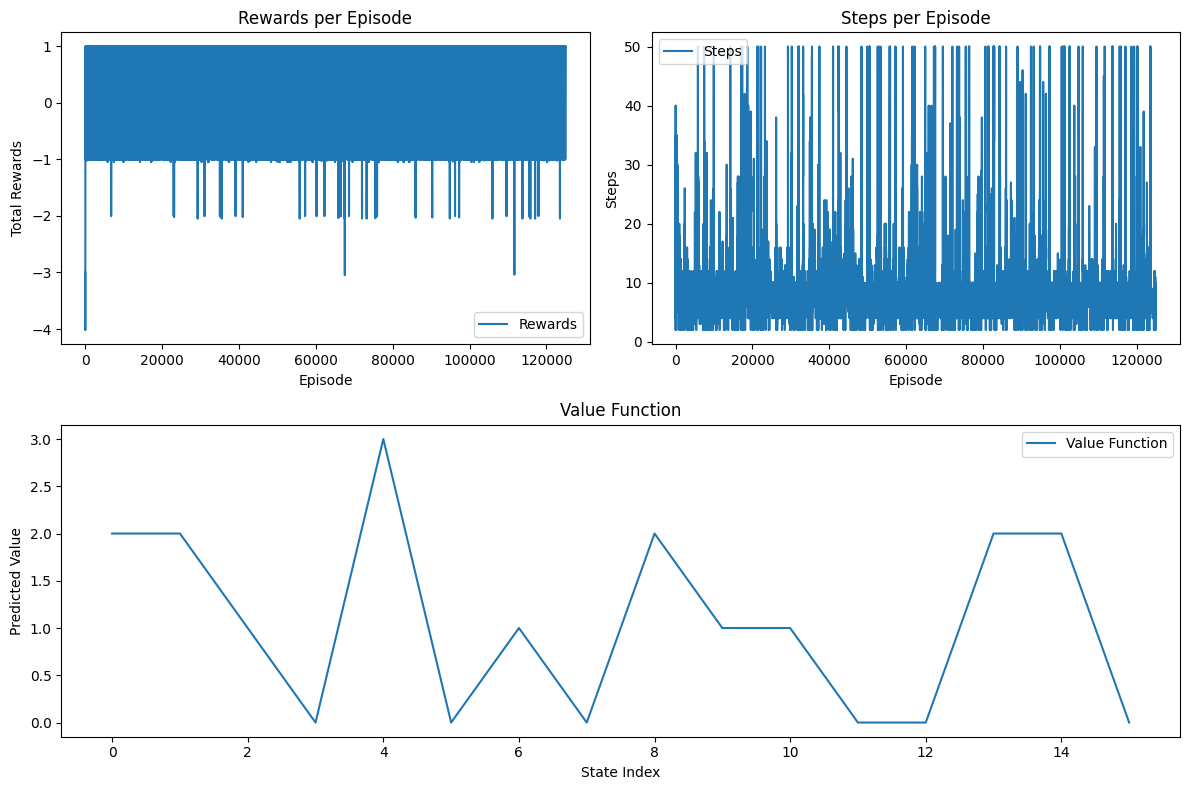

In [ ]:
# Best alpha=0.01, epsilon=0.5, decay_rate=0.5, gamma=0.01
cv = ExpectedSarsaCV(frozen_lake, params_grid)
cv.search(episodes=125000)
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ) + Random Walk

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]


Alpha: 0.0100, Gamma: 0.9000, Avg Success: 23.50%, Avg Rewards: 0.03
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 23.50%, Avg Rewards: 0.03


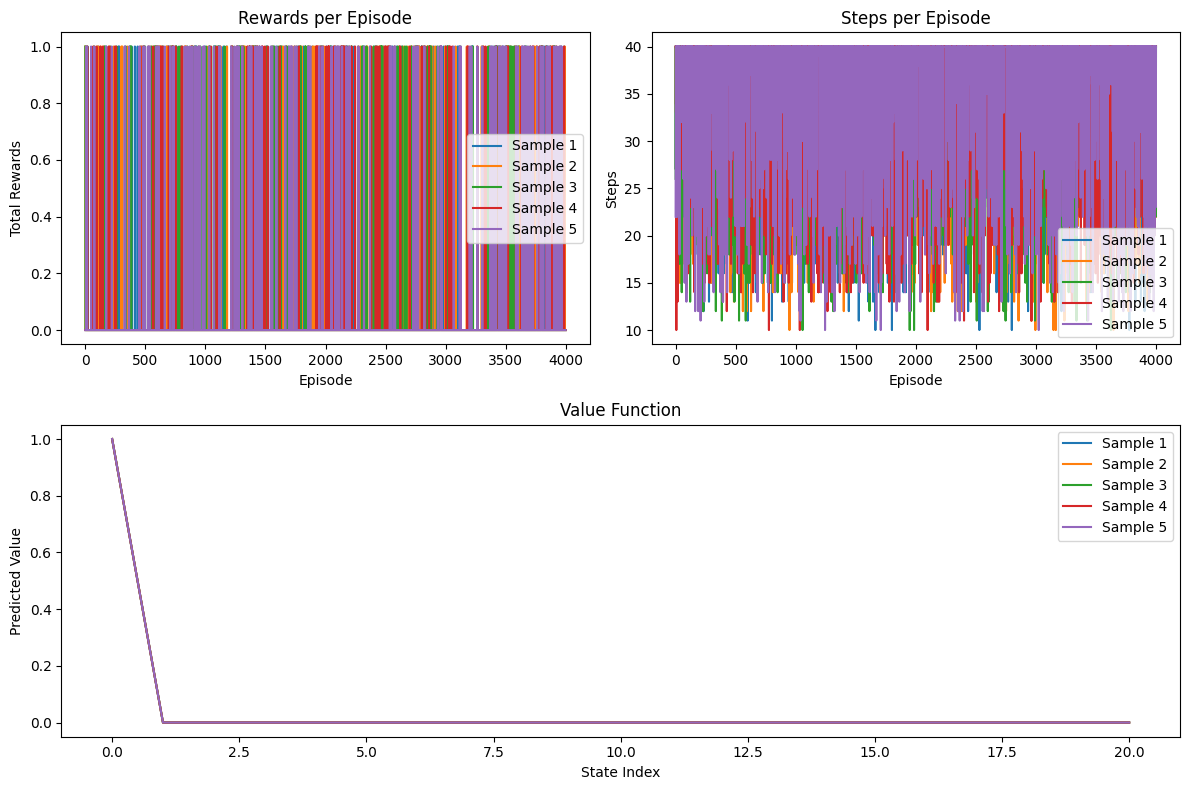

In [ ]:
cv = TrueOnlineTDLambdaCV(random_walk, params_grid)
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ) + Frozen Lake

Number of permutations: 1
Alpha values: [0.01]
Gamma values: [0.9]
Alpha: 0.0100, Gamma: 0.9000, Avg Success: 0.00%, Avg Rewards: -1.00
Top 5 Results:
Run 1: {'alpha': 0.01, 'gamma': 0.9, 'lambd': 0.5}, Avg Success: 0.00%, Avg Rewards: -1.00


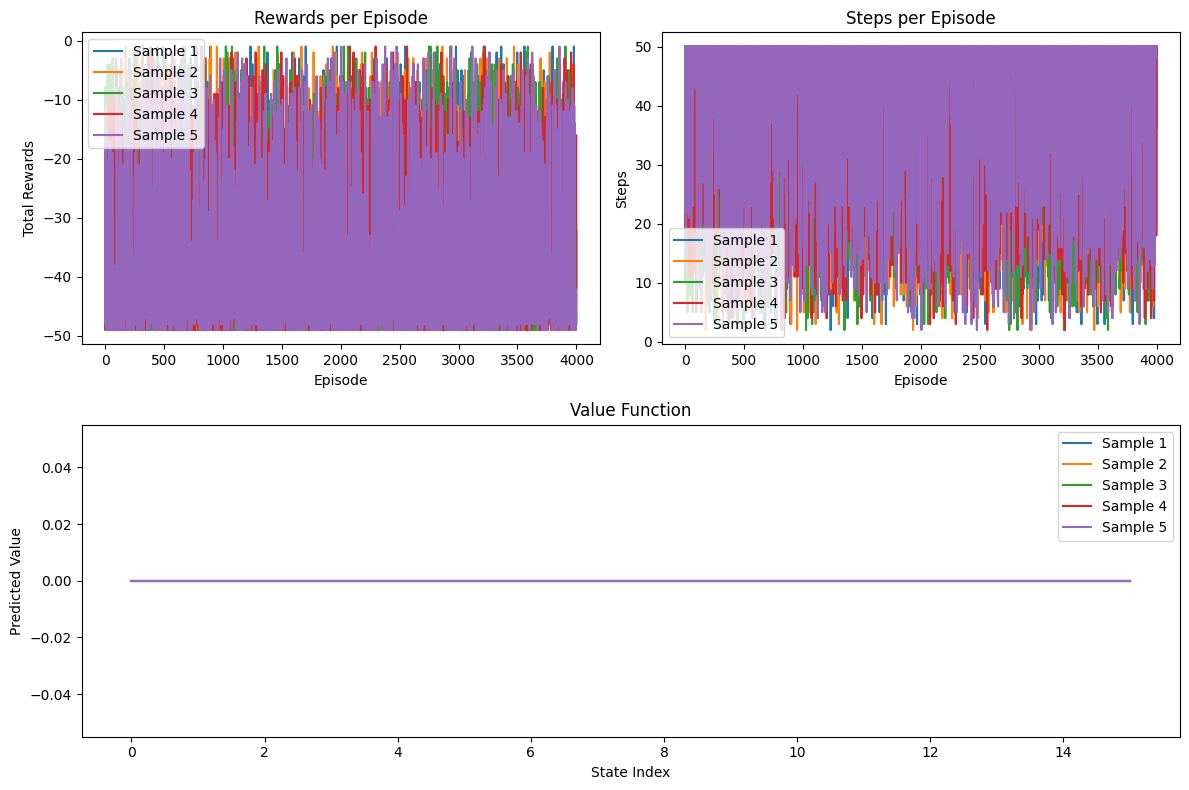

In [ ]:
cv = TrueOnlineTDLambdaCV(frozen_lake, params_grid)
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ)-Replay + Random Walk

In [ ]:
cv = TrueOnlineTDLambdaReplayCV(random_walk, params_grid)
cv.search()
cv.summary()
cv.plot_metrics()

### TrueOnlineTD(λ)-Replay + Frozen Lake

In [ ]:
cv = TrueOnlineTDLambdaReplayCV(frozen_lake, params_grid)
cv.search()
cv.summary()
cv.plot_metrics()